# Acquire Exercises for Time Series

Create a new local git repository and remote repository on github named time-series-exercises. Save this work for this module in your time-series-exercises repo.

The end result of this exercise should be a file named acquire.py.

    1. Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.
    2. Do the same thing, but for planets.
    3. Extract the data for starships.
    4. Save the data in your files to local csv files so that it will be faster to access in the future.
    5. Combine the data from your three separate dataframes into one large dataframe.
    6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
    7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.



In [1]:
import pandas as pd

import requests
import math
import os

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
import prepare as p

In [2]:
# #1 - import all the people into a dictionary

# set our base url and the url we need for people
base_url = 'https://swapi.dev/api/'
people_url = base_url + 'people/'

In [3]:
# take an initial look at what we get back
response = requests.get(people_url)
response

<Response [200]>

In [4]:
type(response)

requests.models.Response

In [5]:
response.headers

{'Server': 'nginx/1.16.1', 'Date': 'Thu, 01 Jun 2023 15:52:04 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept, Cookie', 'X-Frame-Options': 'SAMEORIGIN', 'ETag': '"b493126da505af6fec015ec116fec193"', 'Allow': 'GET, HEAD, OPTIONS', 'Strict-Transport-Security': 'max-age=15768000'}

In [6]:
response.cookies

<RequestsCookieJar[]>

In [7]:
response.apparent_encoding

'ascii'

In [8]:
data = response.json()
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [9]:
# initialize list of 'people'
people_list = []
people_list= people_list + data['results']

# set num_pages to be number of pages we need to ask for
num_pages = math.ceil(data['count'] / len(data['results']))

In [10]:
print(f'people_list length = {len(people_list)}')

people_list length = 10


### Note: The Star Wars API is nice and useable, but not all api's are as nice.
- Ex. data['next'] gives the uri of the next page, for others you might have to make a string with '.../?page=2', etc. to get all the pages.


Even the swapi has some quirks:
- Ex: the JSON (dictionary) has some key-value pairs where the value is a list of uri's, and those uri's lead to other dictionaries, i.e. films. So you'd have to follow the film uri to get the actual name of the film for, say, Luke Skywalker.


For more info on requests.models.Response object, see curriculum and https://www.w3schools.com/python/ref_requests_response.asp

In [11]:
# make a loop to get all the pages worth of data
for i in range (1, num_pages):
    #set next_uri
    next_uri = data['next']

    # get the response and put the json into data
    response = requests.get(next_uri)
    data = response.json()

    # add the results portion to people_list
    people_list= people_list + data['results']

people_df = pd.DataFrame(people_list)
people_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [12]:
def get_swapi_df(entity='people'):
    """
    This function will accept the entity of a Star Wars API URI
    - default entity = 'people'
    - other options: 'planets', 'films', 'starships', etc.
    - requests json files for all pages for the entity requested utilizing swapi,
      and writes data to a local csv
    - OR if csv already exists, reads in data from local csv
    - returns a dataframe of all entities requested
    """
    # set filename for csv file to read or to write later after pulling data from Star Wars API
    filename = 'sw_' + entity + '.csv'
    
    # if filename exists, read from the csv file
    if os.path.isfile(filename):
        entity_df = pd.read_csv(filename)
        print ("csv file found and read")
        return entity_df
    
    # else get data from swapi
    else:
        
        # set base_url per Star Wars API documentation
        base_url = 'https://swapi.dev/api/'

        # set entity uri per documentation
        entity_uri = base_url + entity + '/'

        # get the initial request
        response = requests.get(entity_uri)
        data = response.json()

        # initialize list of entities
        entity_list = []
        entity_list = entity_list + data['results']

        # set num_pages to be number of pages we need to ask for
        num_pages = math.ceil(data['count'] / len(data['results']))

        # make a loop to get all the pages worth of data
        for i in range (1, num_pages):
            #set next_uri
            next_uri = data['next']

            # get the response and put the json into data
            response = requests.get(next_uri)
            data = response.json()

            # add the results portion to people_list
            entity_list = entity_list + data['results']
            
        # make df and write to csv
        entity_df = pd.DataFrame(entity_list)
        entity_df.to_csv(filename, index=False)
        
        print (f'csv file not found, data read from {entity_uri}, csv created')
        return entity_df


In [13]:
people_df = get_swapi_df('people')

csv file found and read


In [14]:
planets_df = get_swapi_df('planets')

csv file found and read


In [15]:
starships_df = get_swapi_df('starships')

csv file found and read


In [16]:
people_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],"['https://swapi.dev/api/vehicles/14/', 'https:...","['https://swapi.dev/api/starships/12/', 'https...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],[],['https://swapi.dev/api/starships/13/'],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],['https://swapi.dev/api/vehicles/30/'],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [17]:
planets_df.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"['https://swapi.dev/api/people/5/', 'https://s...","['https://swapi.dev/api/films/1/', 'https://sw...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],['https://swapi.dev/api/films/1/'],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],['https://swapi.dev/api/films/2/'],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,NaN,"swamp, jungles",8,unknown,[],"['https://swapi.dev/api/films/2/', 'https://sw...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [18]:
# Per exercise instructions:     
# 5. Combine the data from your three separate dataframes into one large dataframe.
big_ugly_df = pd.concat([people_df, planets_df, starships_df], axis=0)
big_ugly_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# defining a function to read german power data
def get_german_power_df():
    """
    This function will
    - read in data to a dataframe from a local csv OR from 
      https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
    - return the dataframe
    """
    # set filename for csv file to read or to write later after pulling data from the web
    filename = 'opsd_germany_daily.csv'
    
    # if filename exists, read from the csv file
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        print ("csv file found and read")
    
    # else get data from web
    else:
        url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
        df = pd.read_csv(url)
        df.to_csv(filename)
        print(f'csv file not found; data read from {url}')
    
    return df

In [20]:
df = get_german_power_df()

csv file found and read


In [21]:
df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [22]:
df.Wind.value_counts()

21.540     2
193.681    2
96.107     2
34.973     2
229.770    2
          ..
35.317     1
19.479     1
33.386     1
64.503     1
721.176    1
Name: Wind, Length: 2913, dtype: int64

In [23]:
# test the functions that are now in acquire.py file
df = a.get_swapi_df('films')

csv file found and read


In [24]:
df.head()

,title,episode_id,opening_crawl,director,producer,release_date,characters,planets,starships,vehicles,species,created,edited,url
0,A New Hope,4,It is a period of civil war.\r\nRebel spaceshi...,George Lucas,"Gary Kurtz, Rick McCallum",1977-05-25,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/4/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-10T14:23:31.880000Z,2014-12-20T19:49:45.256000Z,https://swapi.dev/api/films/1/
1,The Empire Strikes Back,5,It is a dark time for the\r\nRebellion. Althou...,Irvin Kershner,"Gary Kurtz, Rick McCallum",1980-05-17,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/4/', 'https://...","['https://swapi.dev/api/starships/3/', 'https:...","['https://swapi.dev/api/vehicles/8/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-12T11:26:24.656000Z,2014-12-15T13:07:53.386000Z,https://swapi.dev/api/films/2/
2,Return of the Jedi,6,Luke Skywalker has returned to\r\nhis home pla...,Richard Marquand,"Howard G. Kazanjian, George Lucas, Rick McCallum",1983-05-25,"['https://swapi.dev/api/people/1/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/2/', 'https:...","['https://swapi.dev/api/vehicles/8/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-18T10:39:33.255000Z,2014-12-20T09:48:37.462000Z,https://swapi.dev/api/films/3/
3,The Phantom Menace,1,Turmoil has engulfed the\r\nGalactic Republic....,George Lucas,Rick McCallum,1999-05-19,"['https://swapi.dev/api/people/2/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/31/', 'https...","['https://swapi.dev/api/vehicles/33/', 'https:...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-19T16:52:55.740000Z,2014-12-20T10:54:07.216000Z,https://swapi.dev/api/films/4/
4,Attack of the Clones,2,There is unrest in the Galactic\r\nSenate. Sev...,George Lucas,Rick McCallum,2002-05-16,"['https://swapi.dev/api/people/2/', 'https://s...","['https://swapi.dev/api/planets/1/', 'https://...","['https://swapi.dev/api/starships/21/', 'https...","['https://swapi.dev/api/vehicles/4/', 'https:/...","['https://swapi.dev/api/species/1/', 'https://...",2014-12-20T10:57:57.886000Z,2014-12-20T20:18:48.516000Z,https://swapi.dev/api/films/5/


In [25]:
df = a.get_german_power_df()
df.head()

csv file found and read


,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


# Prepare lesson

The end result of this exercise should be a file named prepare.py.

Using your store items data:

1. Convert date column to datetime format.
2. Plot the distribution of sale_amount and item_price.
3. Set the index to be the datetime variable.
4. Add a 'month' and 'day of week' column to your dataframe.
5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [26]:
df = pd.read_csv('ts_superstore.csv', index_col=0)
df.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_id        913000 non-null  int64  
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [28]:
df.isnull().sum()

item             0
sale_amount      0
sale_date        0
sale_id          0
store            0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
dtype: int64

In [29]:
df.describe()

,item,sale_amount,sale_id,store,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,25.500000,5.160400,2.384688e+11,2.384688e+11,5.500000,78224.800000
std,14.430878,28.801144,263560.542223,2.872283,14.430878,2.737764,2.978005e+11,2.978005e+11,2.872283,16.479087
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,1.000000,78201.000000
25%,13.000000,30.000000,228250.750000,3.000000,13.000000,2.970000,3.367410e+10,3.367410e+10,3.000000,78217.000000
50%,25.500000,47.000000,456500.500000,5.500000,25.500000,5.195000,7.103651e+10,7.103651e+10,5.500000,78220.500000
75%,38.000000,70.000000,684750.250000,8.000000,38.000000,7.520000,6.030842e+11,6.030842e+11,8.000000,78232.000000
max,50.000000,231.000000,913000.000000,10.000000,50.000000,9.640000,8.846237e+11,8.846237e+11,10.000000,78253.000000


In [30]:
# dates are still strings
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [31]:
df.sale_date.str.contains('00:00:00').sum()

913000

In [32]:
df.shape

(913000, 16)

In [33]:
# so we can remove hh:mm:ss GMT
df.sale_date = df.sale_date.str.replace('00:00:00 GMT', '')

In [34]:
# remove a stray space
df.sale_date = df.sale_date.str.strip()

In [35]:
df.sale_date[0]

'Tue, 01 Jan 2013'

In [36]:
# using this code and sending in the format argument made it run a LOT faster
df.sale_date = pd.to_datetime(df.sale_date, format= '%a, %d %b %Y')

In [37]:
df = df.set_index('sale_date')

In [38]:
df = df.sort_index()

In [39]:
df.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [40]:
df.index.value_counts().sort_values()

2013-01-01    500
2013-01-06    500
2013-01-07    500
2013-01-08    500
2013-01-09    500
             ... 
2017-12-30    500
2017-12-19    500
2017-12-05    500
2017-12-03    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

In [41]:
# of days between min and max inclusive
df.index.max() - df.index.min() + pd.Timedelta('1d')

Timedelta('1826 days 00:00:00')

In [42]:
# check for gap in time
df.index.nunique()

1826

In [43]:
# Because 1826 == 1826, no gap. If there were gaps, 
# to establish all the expected dates in our range
exp_range = pd.date_range(start=df.index.min(), end=df.index.max()) 

In [44]:
# in this case no missing dates
exp_range.difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [45]:
# clean up repeated columns
df.columns

Index(['item', 'sale_amount', 'sale_id', 'store', 'item_brand', 'item_id',
       'item_name', 'item_price', 'item_upc12', 'item_upc14', 'store_address',
       'store_city', 'store_id', 'store_state', 'store_zipcode'],
      dtype='object')

In [46]:
df[df.item == df.item_id].shape

(913000, 15)

In [47]:
df[df.store == df.store_id].shape

(913000, 15)

In [48]:
df[df.item_upc12 == df.item_upc14].shape

(913000, 15)

In [49]:
# so I can drop item, store, item_upc12 and keep item_id, store_id, item_upc14
df = df.drop(columns=['item', 'store', 'item_upc12'])
df.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


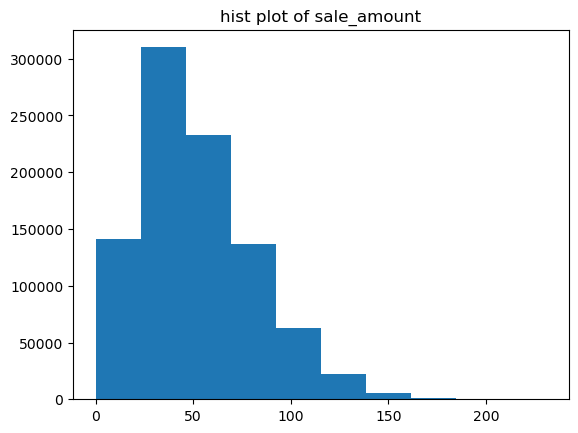

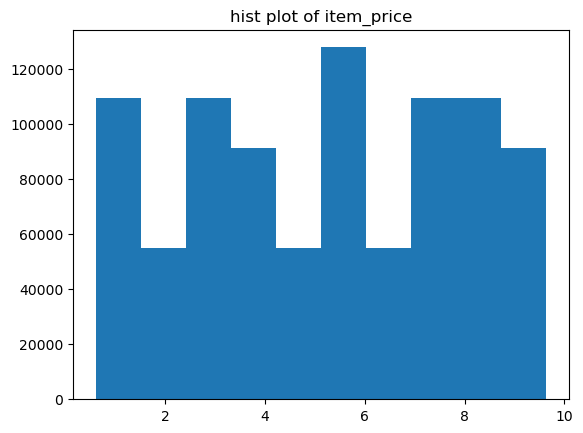

In [50]:
# get to know data: plot distribution of sale_amount and item_price
# target = sale_amount

for col in ['sale_amount', 'item_price']:
    plt.hist(df[col])
    plt.title(f'hist plot of {col}')
    plt.show()

In [51]:
df['month'] = df.index.month_name()

In [52]:
df['day_of_week'] = df.index.day_name()

In [53]:
df['sales_total'] = df.sale_amount * df.item_price

In [54]:
df.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,30.16
2013-01-01,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,January,Tuesday,308.48
2013-01-01,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,197.55
2013-01-01,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,January,Tuesday,25.16


In [55]:
# reorder columns
cols = ['sale_amount', 'item_price', 'sales_total', 'month', 'day_of_week', 'item_id', 'store_id', 'sale_id'
        , 'item_name', 'item_brand', 'item_upc14', 'store_address', 'store_city', 'store_state', 'store_zipcode']

In [56]:
df = df[cols]

In [57]:
# defining a function to acquire and prepare ts_superstore dataframe
def get_superstore_df(filename='ts_superstore.csv'):
    """
    This function will
    - accept a file name of a csv stored locally, default is ts_superstore.csv
    - read the csv into a dataframe
    - convert the sales_date column to a datetime datatype
    - set sales_date as the index and sort the index
    - remove three repeated columns ('store', 'item', 'item_upc12')
    - add three columns: 
        - 'month' in format 'January'
        - 'day' in format 'Monday'
        - 'sales_total' which is sale_amount (total_items) * item_price
    - reorder the dataframe columns
    - return the prepared df
    """
    
    # read in dataframe from csv
    df = pd.read_csv(filename, index_col=0)
    
    # format sale_date and change it from a string to a datetime
    df.sale_date = df.sale_date.str.replace(' 00:00:00 GMT', '')
    # using this code and sending in the format argument made it run a LOT faster
    df.sale_date = pd.to_datetime(df.sale_date, format= '%a, %d %b %Y')
    df = df.set_index('sale_date')
    df = df.sort_index()
    
    # drop item, store, item_upc12 and keep item_id, store_id, item_upc14
    df = df.drop(columns=['item', 'store', 'item_upc12'])
    
    # add 3 columns for exploration
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    
    # reorder columns
    cols = ['sale_amount', 'item_price', 'sales_total', 'month', 'day_of_week', 'item_id', 'store_id', 'sale_id'
            , 'item_name', 'item_brand', 'item_upc14', 'store_address', 'store_city', 'store_state', 'store_zipcode']
    df = df[cols]
    
    return df

In [58]:
df = p.get_superstore_df()

In [59]:
df.head()

,sale_amount,item_price,sales_total,month,day_of_week,item_id,store_id,sale_id,item_name,item_brand,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,0.84,10.92,January,Tuesday,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,26.0,1.16,30.16,January,Tuesday,17,3,295813,Ducal Refried Red Beans,Ducal,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,32.0,9.64,308.48,January,Tuesday,7,10,125995,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,45.0,4.39,197.55,January,Tuesday,18,3,314073,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,34.0,0.74,25.16,January,Tuesday,19,3,332333,Careone Family Comb Set - 8 Ct,Careone,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   item_price     913000 non-null  float64
 2   sales_total    913000 non-null  float64
 3   month          913000 non-null  object 
 4   day_of_week    913000 non-null  object 
 5   item_id        913000 non-null  int64  
 6   store_id       913000 non-null  int64  
 7   sale_id        913000 non-null  int64  
 8   item_name      913000 non-null  object 
 9   item_brand     913000 non-null  object 
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 111.5+ MB


# OPS data (Germany power data)

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [42]:
df = a.get_german_power_df()

csv file found and read


In [43]:
df.sample(10)

,Date,Consumption,Wind,Solar,Wind+Solar
2403,2012-07-31,1275.594,37.241,128.371,165.612
1685,2010-08-13,1278.425,17.325,NaN,NaN
2117,2011-10-19,1462.723,196.005,NaN,NaN
1496,2010-02-05,1509.085,141.031,NaN,NaN
2269,2012-03-19,1323.263,159.868,75.965,235.833
4240,2017-08-11,1329.039,108.577,42.198,150.775
330,2006-11-27,1486.959,NaN,NaN,NaN
920,2008-07-09,1369.517,NaN,NaN,NaN
113,2006-04-24,1345.851,NaN,NaN,NaN
2893,2013-12-03,1468.226,48.058,45.517,93.575


In [44]:
37.241+128.371

165.61200000000002

In [45]:
df.shape

(4383, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


In [47]:
df.Date.nunique()

4383

In [48]:
df.columns = df.columns.str.lower()

In [49]:
df = df.rename(columns={'wind+solar': 'wind_and_solar'})

In [50]:
df.head()

,date,consumption,wind,solar,wind_and_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [55]:
# filling nulls in wind and solar to be 0
df.wind = df.wind.fillna(0)
df.solar = df.solar.fillna(0)

In [56]:
df.head()

,date,consumption,wind,solar,wind_and_solar
0,2006-01-01,1069.184,0.0,0.0,NaN
1,2006-01-02,1380.521,0.0,0.0,NaN
2,2006-01-03,1442.533,0.0,0.0,NaN
3,2006-01-04,1457.217,0.0,0.0,NaN
4,2006-01-05,1477.131,0.0,0.0,NaN


In [57]:
# wind_and_solar is not correct; resetting

df.wind_and_solar = df.wind + df.solar

In [58]:
df.sample(10)

,date,consumption,wind,solar,wind_and_solar
1529,2010-03-10,1548.41900,82.970,0.000,82.970
1920,2011-04-05,1431.69600,182.346,0.000,182.346
1369,2009-10-01,1382.88100,0.000,0.000,0.000
2425,2012-08-22,1314.67500,143.300,128.809,272.109
187,2006-07-07,1360.06100,0.000,0.000,0.000
4237,2017-08-08,1343.89900,247.468,143.742,391.210
722,2007-12-24,1168.74400,0.000,0.000,0.000
4272,2017-09-12,1428.50639,460.808,103.031,563.839
1630,2010-06-19,1125.19000,123.394,0.000,123.394
4133,2017-04-26,1488.59100,54.224,104.559,158.783


In [59]:
df.date = df.date.astype('datetime64')

In [60]:
df = df.set_index('date')

In [61]:
df = df.sort_index()

In [62]:
df.head()

,consumption,wind,solar,wind_and_solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [64]:
df['month'] = df.index.month_name()

In [65]:
df['year'] = df.index.year

In [66]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


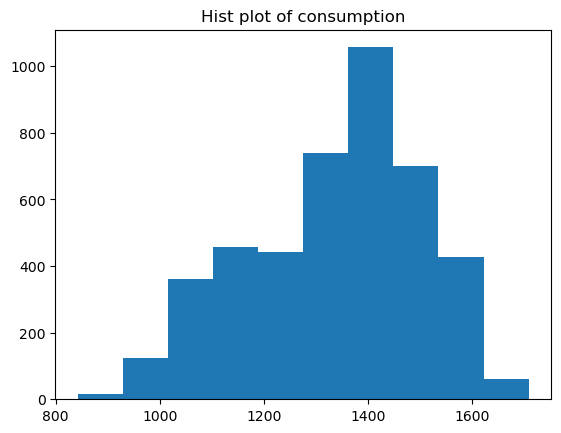

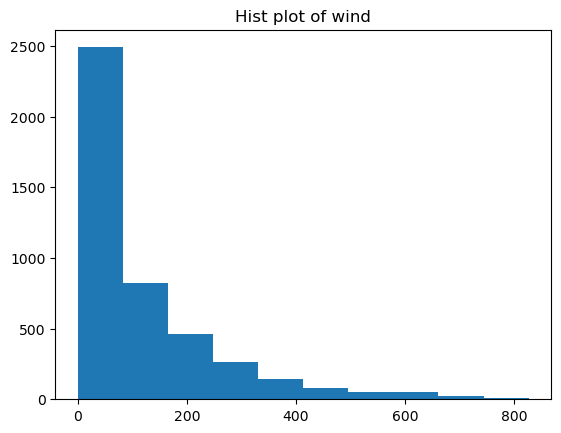

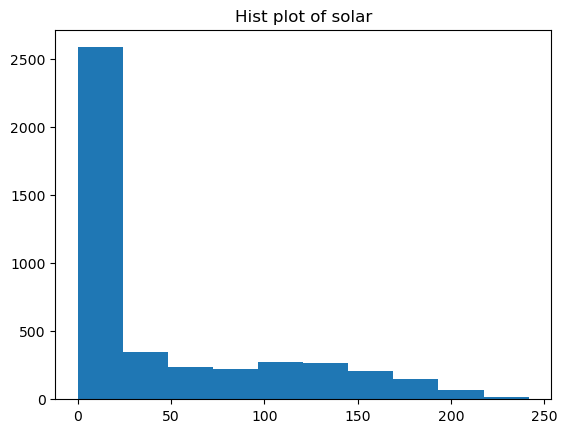

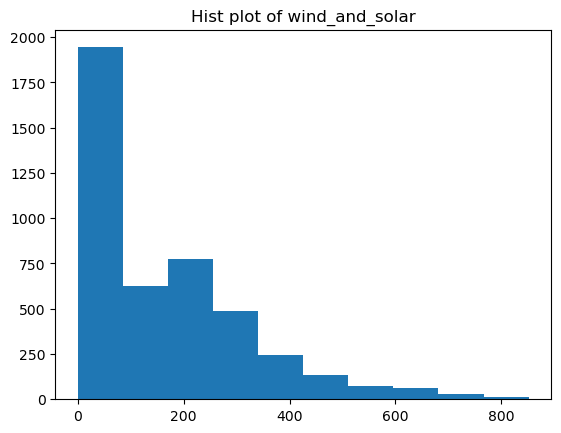

In [67]:
for col in ['consumption', 'wind', 'solar', 'wind_and_solar']:
    plt.hist(df[col])
    plt.title(f'Hist plot of {col}')
    plt.show()

In [68]:
df.resample('Y').sum()

,consumption,wind,solar,wind_and_solar,year
date,,,,,
2006-12-31,489068.53600,0.000,0.000,0.000,732190
2007-12-31,496631.84700,0.000,0.000,0.000,732555
2008-12-31,495570.87600,0.000,0.000,0.000,734928
2009-12-31,459737.42800,0.000,0.000,0.000,733285
2010-12-31,488588.70000,35911.777,0.000,35911.777,733650
2011-12-31,484814.08600,44032.951,0.000,44032.951,734015
2012-12-31,469574.75400,45862.667,27887.332,73749.999,736392
2013-12-31,463336.85300,47197.832,29559.780,76757.612,734745
2014-12-31,504164.82100,51107.672,32498.307,83605.979,735110


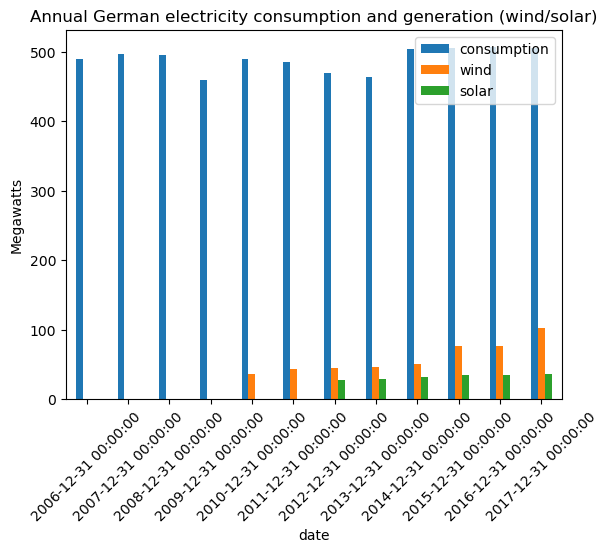

In [8]:
df.resample('Y').sum().plot( y=['consumption', 'wind', 'solar'], kind='bar', rot=45)
plt.title('Annual German electricity consumption and generation (wind/solar)')
plt.yticks(ticks = range(0,600000, 100000), labels= range(0, 600, 100))
plt.ylabel('Megawatts')
# plt.xticks(ticks = ,labels=range(2006, 2018, 1))
plt.show()

In [70]:
df.sample(10)

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2017-05-22,1383.231,67.128,210.585,277.713,May,2017
2011-07-14,1359.981,255.389,0.000,255.389,July,2011
2017-07-16,1046.128,160.913,152.480,313.393,July,2017
2016-05-21,1175.567,133.517,186.839,320.356,May,2016
2013-03-12,1428.073,58.433,37.771,96.204,March,2013
2017-08-17,1377.745,207.760,143.193,350.953,August,2017
2013-01-07,1364.084,30.297,13.157,43.454,January,2013
2009-01-12,1537.377,0.000,0.000,0.000,January,2009
2015-02-25,1585.249,107.047,72.248,179.295,February,2015


In [71]:
df.isnull().sum()

consumption       0
wind              0
solar             0
wind_and_solar    0
month             0
year              0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
 4   month           4383 non-null   object 
 5   year            4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [73]:
# defining a function to prepare german power data
def prepare_german_df(df):
    """
    This function will
    - accept a dataframe from get_german_power_df()
    - rename columns
    - fill nulls in wind and solar with 0
    - recalculate wind_and_solar column because it wasn't right
    - change date column to datetime64 data type, set it as the index, and sort index
    - add two columns:
        - 'month' in form 'January'
        - 'year' in form 2006
    """
    
    # lower case and rename columns
    df.columns = df.columns.str.lower()
    df = df.rename(columns={'wind+solar': 'wind_and_solar'})
    
    # filling nulls in wind and solar to be 0 & recalculating wind_and_solar
    df.wind = df.wind.fillna(0)
    df.solar = df.solar.fillna(0)
    df.wind_and_solar = df.wind + df.solar
    
    # make pandas time aware
    df.date = df.date.astype('datetime64')
    df = df.set_index('date')
    df = df.sort_index()
    
    # adding month and year columns
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    
    return df

In [2]:
df = a.get_german_power_df()

csv file found and read


In [3]:
df = p.prepare_german_df(df)

In [4]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
 4   month           4383 non-null   object 
 5   year            4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [5]:
df = p.wrangle_german_power_df()

csv file found and read


In [6]:
df.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
